## Soundarya - A20466037

## CS422 

## DATA MINING PROJECT


### Abstract

Build a Scikit-Learn pipeline with ONNX based model, using a classifier and feature engineering. With the help of generated .onnx file, we create results by running the actual data. Learn how to research, read and understand the documentation of python tools/packages. 

### Overview

Problem statement: The objective of this project is to build a model that generalizes well out of sample.

Relevant literature: See References

Proposed methodology: The first step of my model using a package called FeatureSelector to manually select a
few features to keep and use in the model. The data is then scaled and principal component analysis (PCA) is
performed on it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn_pandas import DataFrameMapper
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import onnxruntime as rt
import pydot
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer


Loading dataset using pandas

In [2]:
data = pd.read_csv(r'C:\Users\sound\Downloads\data_public.csv.gz', nrows=100, compression='gzip',error_bad_lines=False)
print(data)

             A          B           C          D           E          F  \
0   231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1   -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2   -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3   221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4   228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   
..         ...        ...         ...        ...         ...        ...   
95  -30.799124  -8.534127    0.400329  22.064023  -28.451910 -25.767853   
96  -24.421923 -20.660510    7.466456  21.402297  -27.670726 -27.783578   
97  235.943207  -9.329123  237.286240 -16.089951  135.601298  77.964067   
98  -39.683774 -15.553433    7.884503  15.811503  -24.713041 -22.275495   
99  -32.366423 -15.652219   13.120045  22.510080  -21.891450 -32.167443   

             G           H          I           J           K          L  \
0   131.591871  198.160

Exploratory Data Analysis and Data processing



In [3]:
print("Data Counts",data.count())
print("\n")
print("Describing Data",data.describe())
print("\n")
print("Shape of Dataset",data.shape)
print("\n")
print("Dtypes of data",data.dtypes)

Data Counts A        100
B        100
C        100
D        100
E        100
F        100
G        100
H        100
I        100
J        100
K        100
L        100
M        100
N        100
O        100
Class    100
dtype: int64


Describing Data                 A           B           C           D           E           F  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    52.888901  -17.246465   74.529251   -8.904980   29.812331   -2.238520   
std    129.600655   12.112212  104.900862   42.962448   72.919069   70.200600   
min    -63.872605  -58.692843  -47.572284 -123.941370  -32.620115 -134.928015   
25%    -37.929399  -17.260385    7.696051  -13.937887  -24.139467  -29.922570   
50%    -31.712971  -13.690442   13.118695   15.608442  -19.887064  -23.730438   
75%    224.350691  -10.574427  213.766733   19.677370  127.420940   76.708664   
max    246.514718   -2.878510  237.286240   24.396963  140.047185  109.456428   

                G  

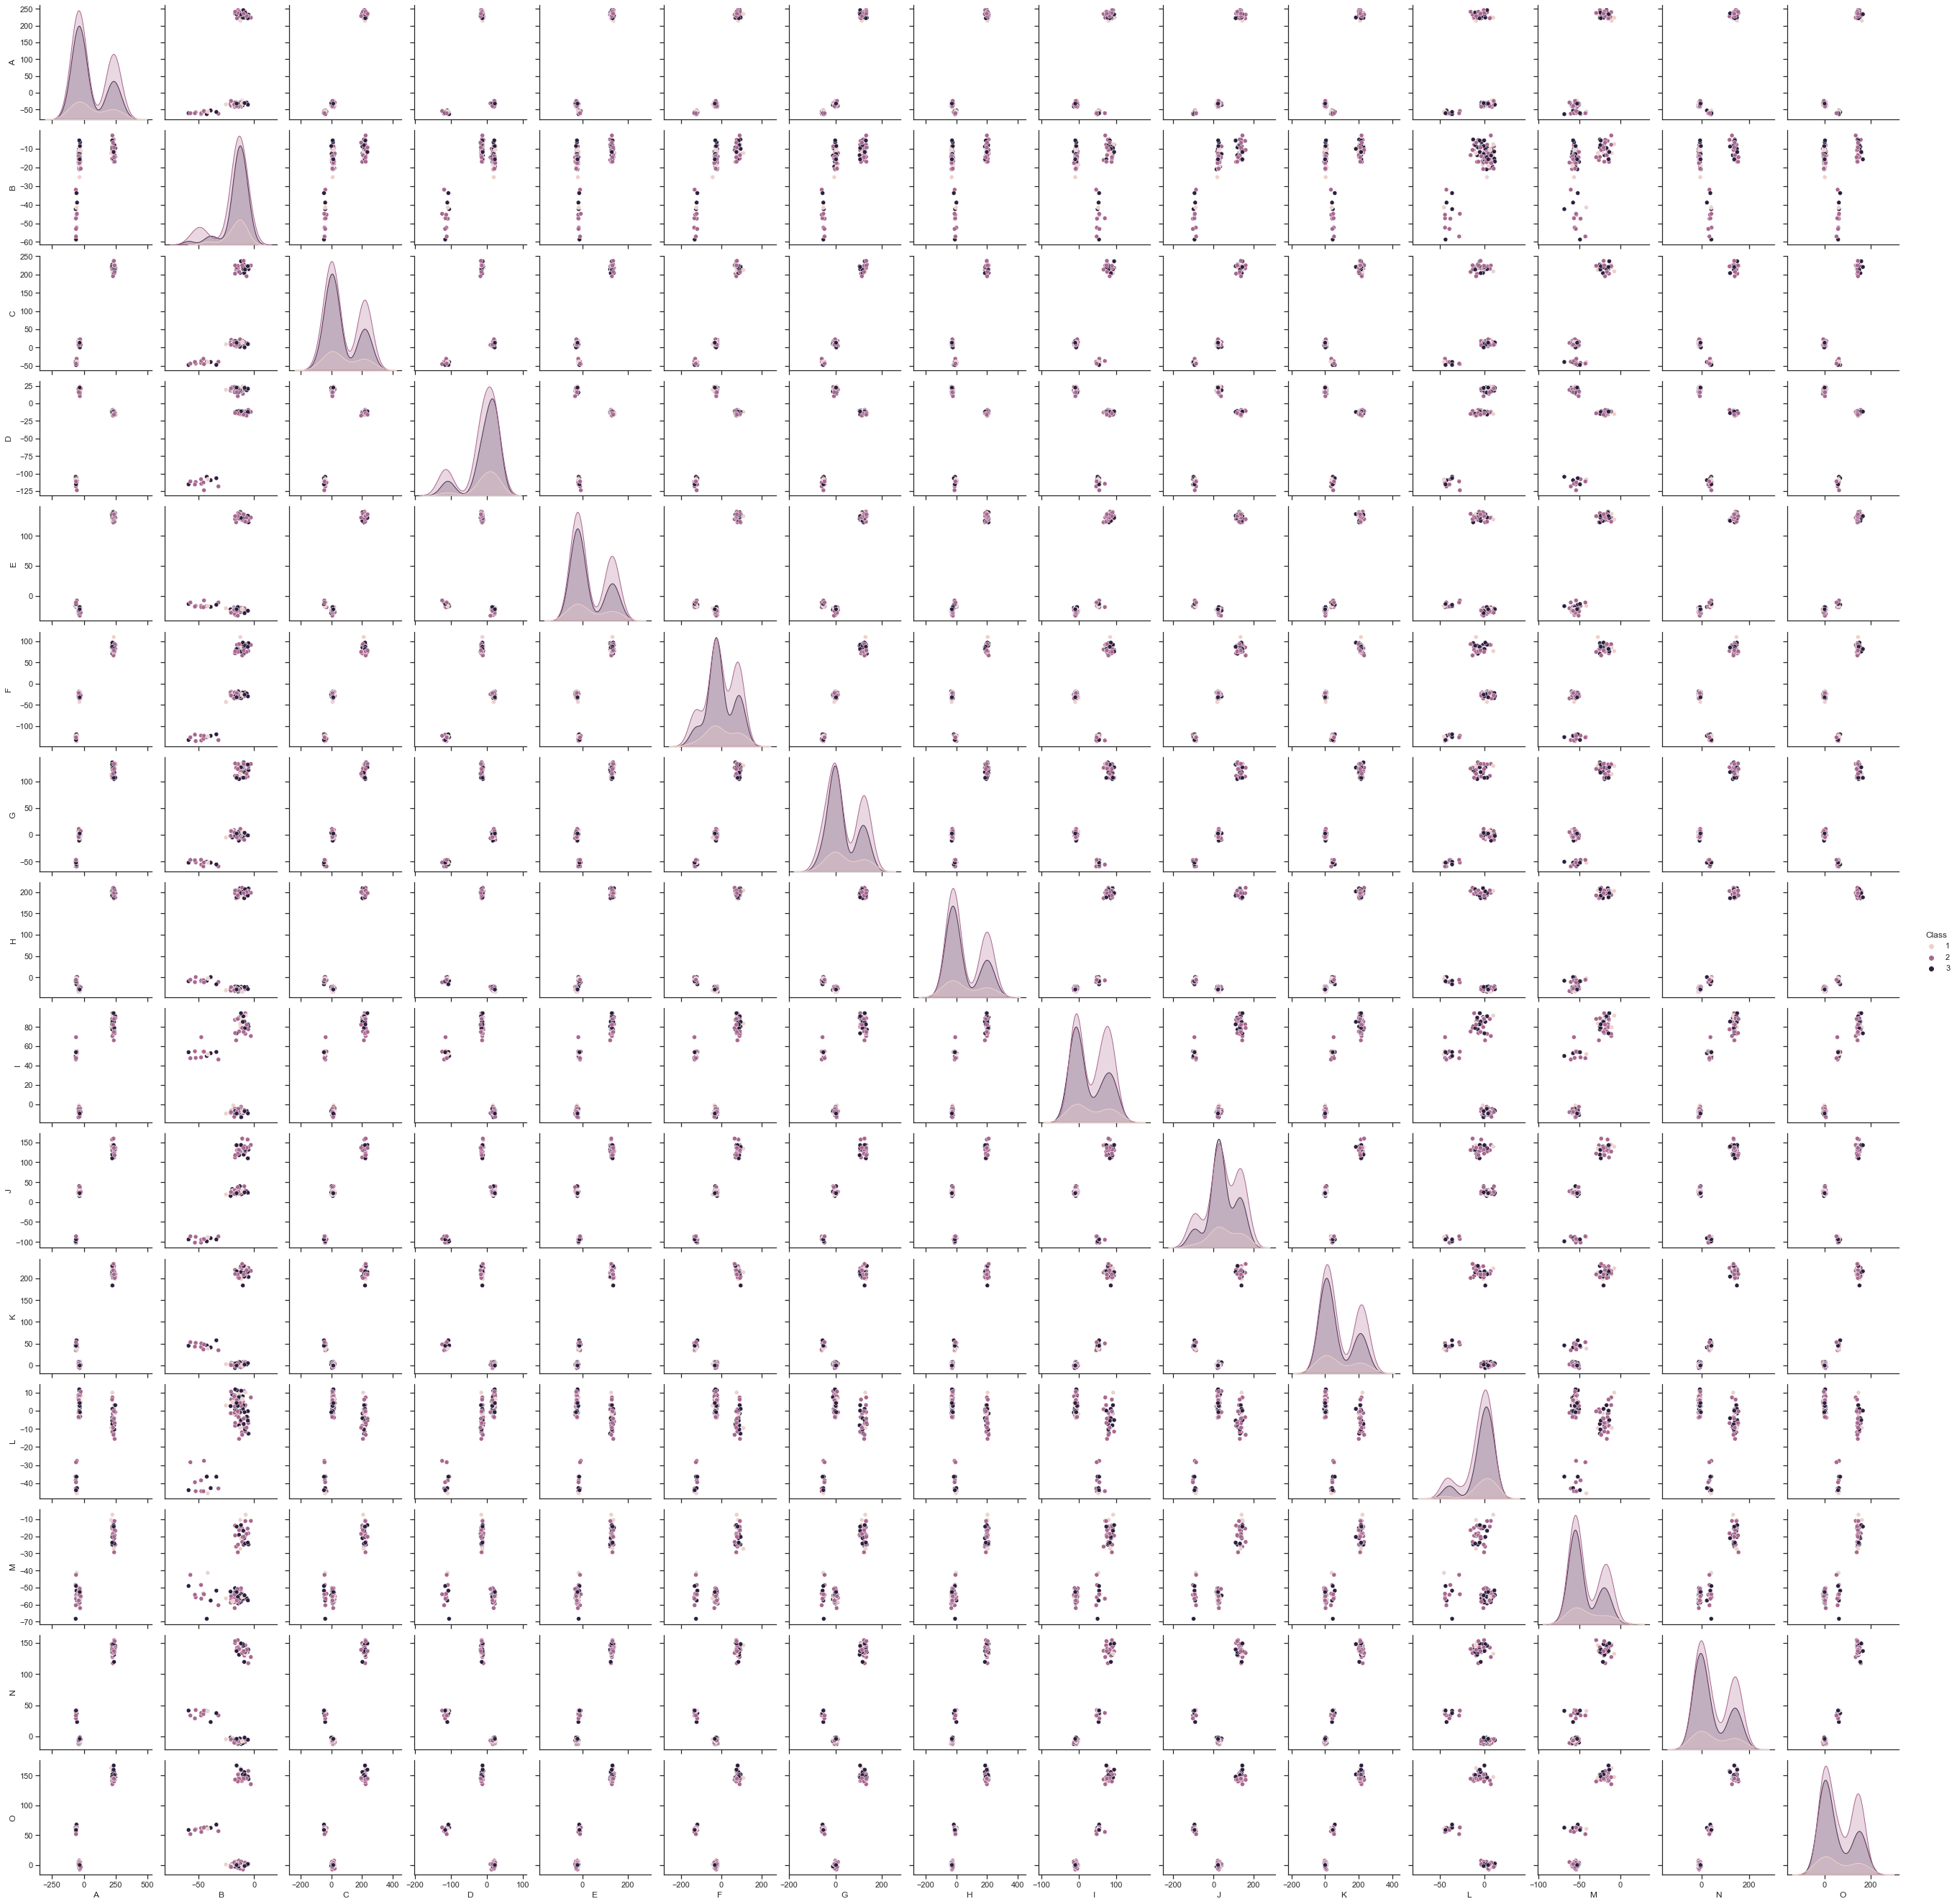

In [4]:
sns.set_theme(style="ticks")
_=sns.pairplot(data, hue="Class")

Removing duplicate values

In [5]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

print(duplicate_rows_df)

number of duplicate rows: (0, 16)
Empty DataFrame
Columns: [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, Class]
Index: []


Evaluating for Null values.
Since there is no null values ,we need not do anything

In [6]:
print(data.isnull().sum())
print("\n")
print(data.groupby('Class').size())  

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64


Class
1    11
2    51
3    38
dtype: int64


Visualizing the class label dataset.

Hence from the plot we got to know that class label 1 has maximum datapoints



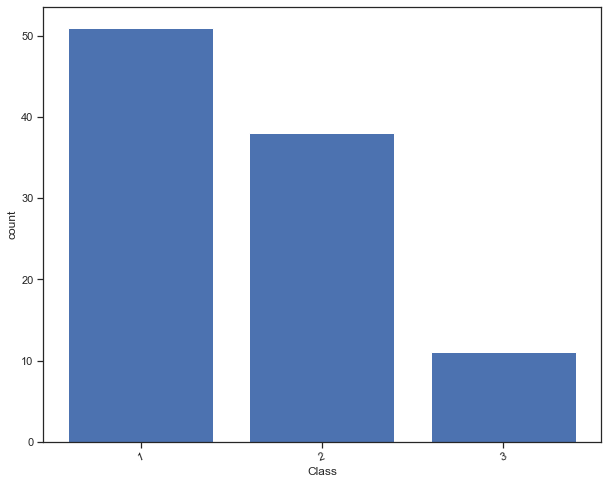

In [7]:

data.Class.value_counts()
plt.figure(figsize=(10,8))
X=np.arange(3)
X_ticks = ["1","2","3"]


plt.xlabel("Class")
plt.ylabel("count")
plt.bar(X, data['Class'].value_counts())
plt.xticks(X,X_ticks, rotation=20)
plt.show()

Generating the heatmap to check the correlation between the features

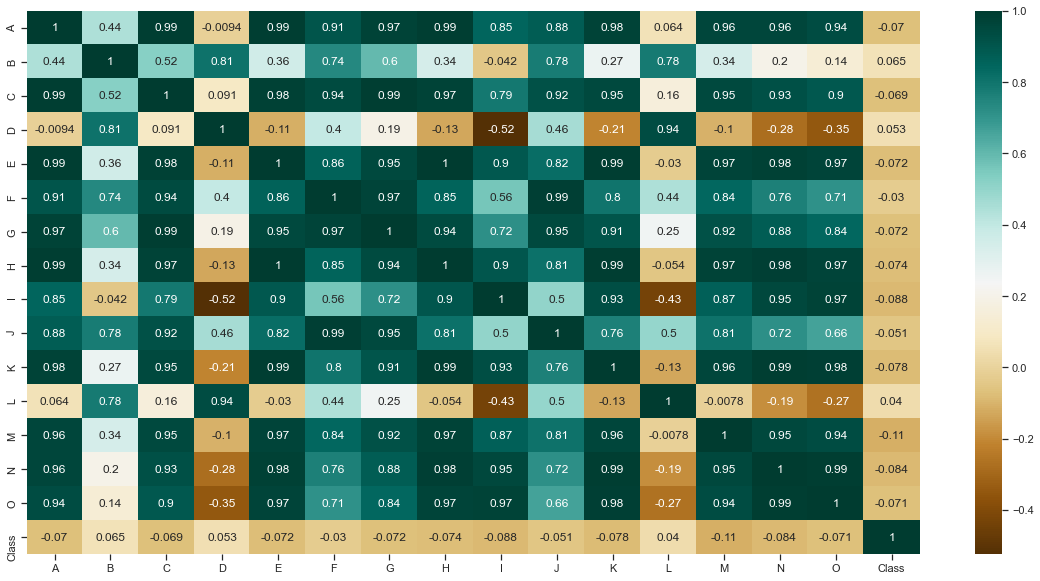

In [8]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True);

Performing Test and Train Split with 80 20 rule.

In [9]:
X = pd.DataFrame(data=data.drop('Class', axis=1),columns=['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O'])
y = pd.DataFrame(data=data['Class'],columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
Data_train = pd.concat([X_train,y_train],axis=1)
print(Data_train.head())

             A          B           C          D           E          F  \
8   -41.092898 -11.525839   12.027010  18.670988  -19.612979 -25.918632   
57  -38.301659 -11.952772   13.117345  16.754501  -20.161149 -23.943846   
11  -23.413125 -11.119531   16.910592  18.915184  -25.170026 -28.504337   
95  -30.799124  -8.534127    0.400329  22.064023  -28.451910 -25.767853   
18  224.664365  -8.612695  221.402716 -11.492636  127.399873  82.218766   

             G           H          I           J           K         L  \
8     5.266337  -25.972718 -13.371210   25.709532   -1.515002 -1.041023   
57    1.006344  -28.242664  -6.034261   25.104704   -4.229109  4.623704   
11   -2.371616  -26.557941  -4.756554   20.160979    3.415932  8.147177   
95    3.776129  -22.965894  -7.092668   24.425441    2.130717 -0.870427   
18  121.803524  196.247035  85.497666  121.325244  228.137325 -9.210585   

            M           N           O  Class  
8  -54.683633  -12.382565    5.424004      3  
57 -

In [11]:
Data_test = pd.concat([X_test,y_test],axis=1)
print(Data_test.head())

             A          B           C           D           E           F  \
69  234.251043 -15.662538  220.653969  -11.713473  132.580641   81.233275   
91  -35.225397 -17.719391   12.727197   23.522409  -23.253474  -34.586486   
14  -58.240602 -52.320437  -43.810581 -112.168505  -16.290017 -134.928015   
7   -28.620633 -16.324678    6.614499   19.866385  -23.119998  -22.328572   
33  -61.020666 -47.286879  -36.729896 -114.643763  -18.341326 -133.597008   

             G           H          I           J           K          L  \
69  106.480956  187.806876  73.336822  142.928584  216.272670  -0.021946   
91    4.809697  -30.295410 -12.941151   20.524971    0.123383   7.832374   
14  -51.453216    0.381228  47.966570  -87.220949   51.825918 -44.290980   
7     1.477065  -26.383605  -8.616671   28.874319    1.743714   4.953251   
33  -55.589170   -7.399473  69.351557  -94.557955   50.672187 -44.272380   

            M           N           O  Class  
69 -14.290670  137.192761  166.70

Balance the classes using SMOTE method

In [12]:
oversample=SMOTE(random_state=0)
X_os,y_os=oversample.fit_resample(X_train,y_train)

print(X_os.shape)
print("\n")
print(y_os)
print("\n")
print(y_os.groupby('Class').size())  

(126, 15)


     Class
0        3
1        2
2        1
3        3
4        2
..     ...
121      3
122      3
123      3
124      3
125      3

[126 rows x 1 columns]


Class
1    42
2    42
3    42
dtype: int64


Pipeline class allows sticking multiple processes into a single scikit-learn estimator. pipeline class has fit, predict and score method just like any other estimator

Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

In [13]:
X=data.drop(['Class'],axis=1)
Y=data['Class']

print(X)

print(y)

             A          B           C          D           E          F  \
0   231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1   -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2   -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3   221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4   228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   
..         ...        ...         ...        ...         ...        ...   
95  -30.799124  -8.534127    0.400329  22.064023  -28.451910 -25.767853   
96  -24.421923 -20.660510    7.466456  21.402297  -27.670726 -27.783578   
97  235.943207  -9.329123  237.286240 -16.089951  135.601298  77.964067   
98  -39.683774 -15.553433    7.884503  15.811503  -24.713041 -22.275495   
99  -32.366423 -15.652219   13.120045  22.510080  -21.891450 -32.167443   

             G           H          I           J           K          L  \
0   131.591871  198.160

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

print(data['Class'].value_counts())

2    51
3    38
1    11
Name: Class, dtype: int64


In [15]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps) # define the pipeline object.

In [16]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

GridSearchCV helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters

In [17]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [18]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [0.001, 0.1, 10, 100, 1000000.0],
                         'SVM__gamma': [0.1, 0.01]})

In [19]:
grid.fit(X_train, y_train)
"score = %3.2f" %(grid.score(X_test,y_test))


C:\Users\sound\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sound\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sound\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sound\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

'score = 0.40'

In [20]:
grid.best_params_


{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}

Define a pipeline to search for the best combination of PCA truncation and classifier regularization.

In [21]:
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)



Best parameter (CV score=0.500):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 15}


C:\Users\sound\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.43 0.46  nan  nan  nan 0.44 0.5   nan  nan  nan 0.44 0.49  nan  nan
  nan 0.44 0.49  nan  nan  nan]
  warnings.warn(
C:\Users\sound\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


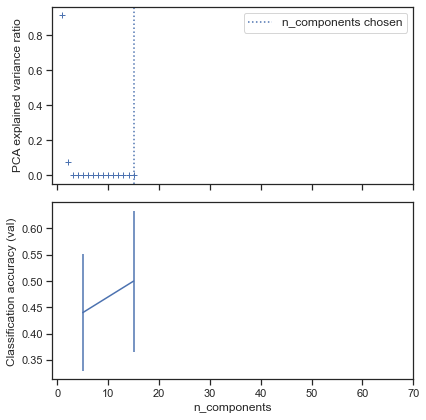

In [22]:
# Plot the PCA spectrum
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

### Training the model

For the given data, a Decision Tree is chosen as the model. This is one of the most common and widely used models for avoiding data overfitting. The 'Class' column was used to divide the data set according to stratified sampling. After that, the model was trained with the training data. The model's most significant features were identified.

In [23]:
features = 'ABCDEFGHIJKLMNO'
for i in range(0, len(features)):

 pipeline = Pipeline([
 ('mapper',
 DataFrameMapper([(X_train.columns.drop([features[i:i+1]]).values,[StandardScaler()])])), 
 ('pca',PCA(n_components=1)),
 ('classifier',DecisionTreeClassifier(max_depth = 3))])
 pipeline.fit(data.drop([features[i:i+1]], axis=1),
 data['Class'])
 results = pipeline.predict(X_test)
 actual = np.concatenate(y_test.values)
 print("Dropped feature:", features[i:i+1], ", Accuracy:", metrics.accuracy_score(actual, results))

Dropped feature: A , Accuracy: 0.5
Dropped feature: B , Accuracy: 0.6
Dropped feature: C , Accuracy: 0.55
Dropped feature: D , Accuracy: 0.65
Dropped feature: E , Accuracy: 0.6
Dropped feature: F , Accuracy: 0.55
Dropped feature: G , Accuracy: 0.6
Dropped feature: H , Accuracy: 0.4
Dropped feature: I , Accuracy: 0.6
Dropped feature: J , Accuracy: 0.7
Dropped feature: K , Accuracy: 0.5
Dropped feature: L , Accuracy: 0.45
Dropped feature: M , Accuracy: 0.4
Dropped feature: N , Accuracy: 0.6
Dropped feature: O , Accuracy: 0.65


Creating pipeline structure

In [24]:

data_features = [0, 1]

data_transformer = Pipeline(steps=[
    ('imputer',
     SimpleImputer(strategy='mean')),
    ('scaler',
     StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('data',
     data_transformer,
     data_features)
])

classifier = DecisionTreeClassifier()

In [25]:
pipeline = Pipeline([
    ('precprocessor',
     preprocessor),
    ('classifier',
     classifier)
])

pipeline.fit(X_train[['C','F']], y_train);

In [26]:
pipeline.predict(X_train[['C','F']])
Xme=X_train[['C','F']]
print(Xme)

             C           F
22  -42.099906 -121.994302
71   15.656210  -20.698841
60  213.516898   89.150737
75    5.534309  -30.937837
99   13.120045  -32.167443
..         ...         ...
63  -39.724489 -124.198496
5   213.391582   80.222540
0   217.624839   76.904999
43  218.224428   79.584513
57   13.117345  -23.943846

[80 rows x 2 columns]


In [27]:
to_drop = [ 'A','B', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N','O']

pipeline0 = Pipeline([
 ('mapper',
 DataFrameMapper([
 (X_train.columns.drop(to_drop).values,
 [StandardScaler()])])),
 ('pca',
 PCA(n_components=1)),
 ('classifier',
 DecisionTreeClassifier(max_depth = 2))
 ])
pipeline0.fit(data.drop(to_drop, axis=1),
 data['Class'])
results = pipeline0.predict(X_test.drop(to_drop, axis=1))
actual = np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual, results))


Accuracy: 0.45


Creating ONNX File

In [28]:

input_types = dict([(x, FloatTensorType([None, 1])) for x in Xme.columns.values])

try:
    model_onnx = convert_sklearn(pipeline,'pipeline_dtree_onnx',initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("dtree_pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())
    print("Onnx Done")

Onnx Done


In [29]:


print(X_test[['C','F']])
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test[['C','F']].to_dict(orient='list').items()}
print(inputs_onnx.keys())

session_onnx = rt.InferenceSession("dtree_pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

             C           F
87    9.322003  -29.892434
13    6.773037  -25.211891
45    7.772583  -26.202514
76  -47.572284 -132.341544
36   10.089798  -20.895704
83  195.182350   74.591900
74    9.939760  -29.025967
4   204.637218   91.101870
2    21.023083  -19.189004
26    3.067638  -20.897764
46  227.010693   70.372045
93    6.320141  -28.321117
33  -36.729896 -133.597008
94   14.365840  -26.469937
44  208.538488   76.374527
70   13.149869  -26.725732
78   15.311921  -30.012980
91   12.727197  -34.586486
20   17.991478  -23.285830
29  -39.677493 -122.619952
dict_keys(['C', 'F'])
predict [3 3 2 2 3 2 3 2 2 3 2 3 2 3 2 3 1 2 2 2]


From the above decision tree classifier model , we are getting only 45% of accuracy . Hence we will proceed further with the build of another model that is logistic regression.

Building 2nd Model with Pipeline - Logistic Regression

In [30]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=1),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.500


C:\Users\sound\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
input_types = dict([(x, FloatTensorType([None, 1])) for x in Xme.columns.values])

try:
    model_onnx = convert_sklearn(pipe_lr,'pipeline_logistic_onnx',initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("Logistic_pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())
    print("Logistic Onnx Done")

Logistic Onnx Done


##### Conclusion

I have created 2 onnx files. 

1)Decision Tree 


2)Logistic Regression

The Logistic regression gave higher accuracy as compared to Decision Tree and hence submitting Logistic Regression file.

The Pipeline was setup to pre process the data and to do feature decomposition.
The final accuracy is calculted using this pipeline.

##### Source Code

References for decision tree model building are taken from links below given:

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://towardsdatascience.com/study-of-decision-trees-and-ensembles-on-scikit-learn-e713a8e532b8

https://chrisalbon.com/machine_learning/trees_and_forests/decision_tree_classifier/

##### Biblography

https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
    
https://stackoverflow.com/questions/65816675/cannot-import-name-delayed-from-sklearn-utils-fixes

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html 
    
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html 

https://stackoverflow.com/questions/50376990/modulenotfounderror-no-module-named-imblearn